<a href="https://colab.research.google.com/github/Konstantin-Larionov/ds_sb_2020_homework/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [227]:
df = pd.read_csv( './ThoraricSurgery.csv')

In [228]:
#посмотрим на датасет
df.head(5)

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [229]:
#удалим параметр id, тк он лишний
del df['id']

df.head(5)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [230]:
#для удобства переименуем наши колонки соответсвенно их смыслу
new_columns = ['диагноз','емкость_легких','объем_выдоха','шкала_зуброда','боль','кровохаркание','одышка',
       'кашель','слабость','размер_опухоли','диабет','ИМ','заболевания_периферических_артерий','курение','астматик','возраст','риск_смерти']
df.columns = new_columns

In [231]:
#смотрим есть ли пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   диагноз                             470 non-null    object 
 1   емкость_легких                      470 non-null    float64
 2   объем_выдоха                        470 non-null    float64
 3   шкала_зуброда                       470 non-null    object 
 4   боль                                470 non-null    object 
 5   кровохаркание                       470 non-null    object 
 6   одышка                              470 non-null    object 
 7   кашель                              470 non-null    object 
 8   слабость                            470 non-null    object 
 9   размер_опухоли                      470 non-null    object 
 10  диабет                              470 non-null    object 
 11  ИМ                                  470 non-n

In [232]:
#описательная статистика числовых данных
df.describe()

,емкость_легких,объем_выдоха,возраст
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


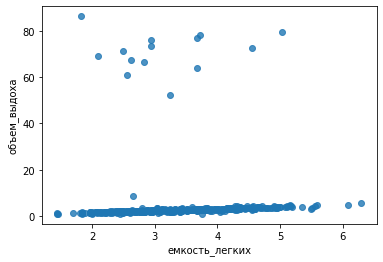

In [233]:
#видим аномальные значения для объема выдоха - большая разница между max и третьим процентилем. Посмотрим зависимость на графике
sns.regplot(x=df['емкость_легких'], y=df['объем_выдоха'], fit_reg=False)

In [234]:
#Добавим столбец, показывающий соотношение объема вдоха к емкости легких и посмотрим его статистику
df['соотношение']=df['объем_выдоха']/df['емкость_легких']
df.describe()

,емкость_легких,объем_выдоха,возраст,соотношение
count,470.000000,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043,1.469587
std,0.871395,11.767857,8.706902,4.236025
min,1.440000,0.960000,21.000000,0.265957
25%,2.600000,1.960000,57.000000,0.713354
50%,3.160000,2.400000,62.000000,0.773837
75%,3.807500,3.080000,69.000000,0.830686
max,6.300000,86.300000,87.000000,47.417582


In [235]:
#Объем выдыхаемого воздуха не может значительно привышать емкость легких, в наших данных есть аномалии
df[df['соотношение']>1.4]

,диагноз,емкость_легких,объем_выдоха,шкала_зуброда,боль,кровохаркание,одышка,кашель,слабость,размер_опухоли,диабет,ИМ,заболевания_периферических_артерий,курение,астматик,возраст,риск_смерти,соотношение
25,DGN5,4.56,72.80,PRZ0,T,T,F,T,F,OC12,F,F,F,T,F,57,F,15.964912
89,DGN3,2.83,66.40,PRZ1,T,T,T,T,F,OC12,F,F,F,T,F,75,F,23.462898
98,DGN3,2.63,67.30,PRZ1,F,F,T,T,F,OC11,F,F,F,T,F,54,F,25.589354
112,DGN3,3.68,64.10,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,60,F,17.418478
132,DGN2,2.50,71.10,PRZ0,F,F,T,F,F,OC13,F,F,F,T,F,64,T,28.440000
215,DGN2,2.66,8.56,PRZ1,F,T,F,T,F,OC12,F,F,F,T,F,61,F,3.218045
255,DGN3,3.72,78.30,PRZ0,T,F,F,T,F,OC12,F,F,F,T,F,44,F,21.048387
319,DGN3,2.10,69.10,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,62,F,32.904762
325,DGN4,5.03,79.30,PRZ1,F,F,T,F,F,OC11,F,F,F,F,F,38,F,15.765408
330,DGN2,2.94,76.00,PRZ1,F,T,T,T,F,OC12,F,F,F,F,F,61,F,25.850340


In [236]:
# приведем наши выбросы к медиане
df.loc[df['соотношение']>1.4, ['объем_выдоха']] = df['емкость_легких']*0.77

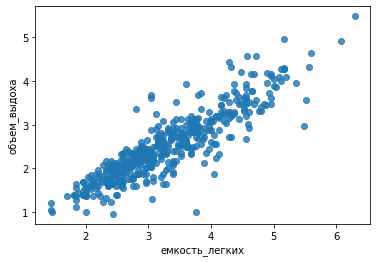

In [237]:
#посмотрим на график взаимосвязи переменных теперь
sns.regplot(x=df['емкость_легких'], y=df['объем_выдоха'], fit_reg=False)
plt.show()

In [238]:
# пока оставим наш столбец в датасете, но пересчитаем его
del df['соотношение']
df['соотношение']=df['объем_выдоха']/df['емкость_легких']

In [239]:
#посмотрим на распределение диагнозов. Видим сильную ассиметрию в данных
dfdgn = df.groupby('диагноз').count()[['возраст']]
dfdgn

,возраст
диагноз,
DGN1,1
DGN2,52
DGN3,349
DGN4,47
DGN5,15
DGN6,4
DGN8,2


In [240]:
#перекодируем категориальные признаки, используя код с занятия
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: 
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]) 
    return result, encoders

ed, encoders = number_encode_features(df)  
ed.head() 

,диагноз,емкость_легких,объем_выдоха,шкала_зуброда,боль,кровохаркание,одышка,кашель,слабость,размер_опухоли,диабет,ИМ,заболевания_периферических_артерий,курение,астматик,возраст,риск_смерти,соотношение
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0,0.750000
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0,0.552941
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0,0.753623
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0.826087
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1,0.393443


In [241]:
encoders

{'ИМ': LabelEncoder(),
 'астматик': LabelEncoder(),
 'боль': LabelEncoder(),
 'диабет': LabelEncoder(),
 'диагноз': LabelEncoder(),
 'заболевания_периферических_артерий': LabelEncoder(),
 'кашель': LabelEncoder(),
 'кровохаркание': LabelEncoder(),
 'курение': LabelEncoder(),
 'одышка': LabelEncoder(),
 'размер_опухоли': LabelEncoder(),
 'риск_смерти': LabelEncoder(),
 'слабость': LabelEncoder(),
 'шкала_зуброда': LabelEncoder()}

In [242]:
#выделим целевую переменную
y = np.array(ed['диагноз'])
del ed['диагноз']

print(y)
len(y)

[1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 3 2 2 6 4 2 2 2 5 2 2 4 2 1 2 2
 2 2 2 4 1 2 4 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 2 2 1 2 2 3 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 3 2 2 2 2 2 3 5 2 2 2 2 3 2 2 4 2 2 2 2 1
 2 2 2 2 3 3 2 3 2 1 2 1 3 2 2 2 2 3 1 2 1 1 2 2 2 1 2 2 2 1 2 2 3 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 4 2 3 2 3 2 2 1 2 2 2 2 2 2 3 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 4 3
 2 2 2 3 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 1 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 4 2 3 1 2 2 2 2 2 2 2 2 1 2 2 3 2 2 2 2 2 0 2 1 2
 2 2 2 2 2 2 2 2 2 2 4 2 2 2 3 2 2 2 3 1 2 2 2 2 2 2 2 1 3 3 2 2 2 3 1 2 2
 3 1 2 2 3 2 2 2 2 3 2 2 1 1 2 1 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 4 5 2
 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 2 1 2 1 3 2 3 3 2 2 1 2 2 2 2 2 1 5 2
 1 2 2 1 2 2 1 2 2 2 2 1 3 4 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 1 1 2
 2 2 6 1 2 2 2 3 2 2 2 3 2 2 2 2 3 2 2 3 2 1 2 2 2 2]


470

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30c8c2cef0>,
      dtype=object)

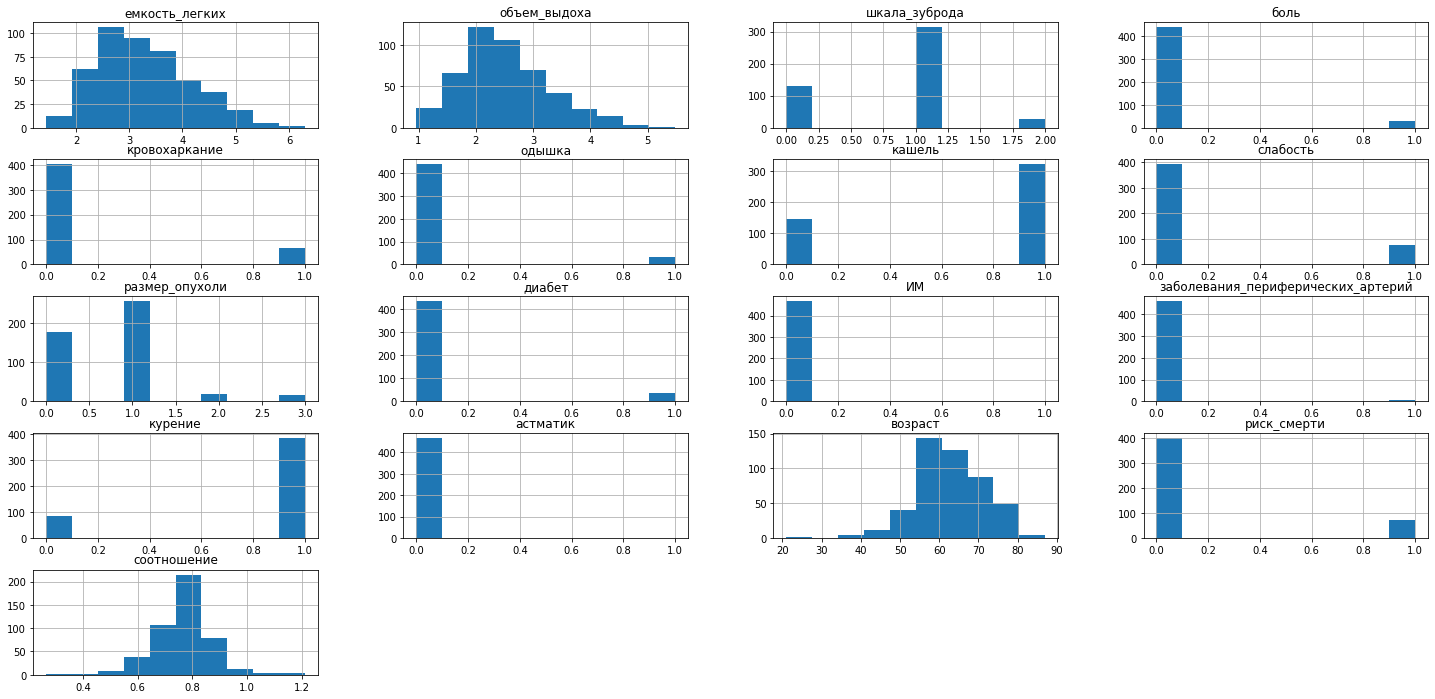

In [243]:
#посмотрим распределение и описательную статистику наших признаков, большинство из них сильно ассиметричны
ed.hist(figsize=(25,12))

In [244]:
ed.describe()

,емкость_легких,объем_выдоха,шкала_зуброда,боль,кровохаркание,одышка,кашель,слабость,размер_опухоли,диабет,ИМ,заболевания_периферических_артерий,курение,астматик,возраст,риск_смерти,соотношение
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.281638,2.512399,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,0.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936,0.764652
std,0.871395,0.768012,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405,0.103924
min,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.265957
25%,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000,0.713354
50%,3.160000,2.360000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000,0.770000
75%,3.807500,2.960000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000,0.824126
max,6.300000,5.480000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000,1.210526


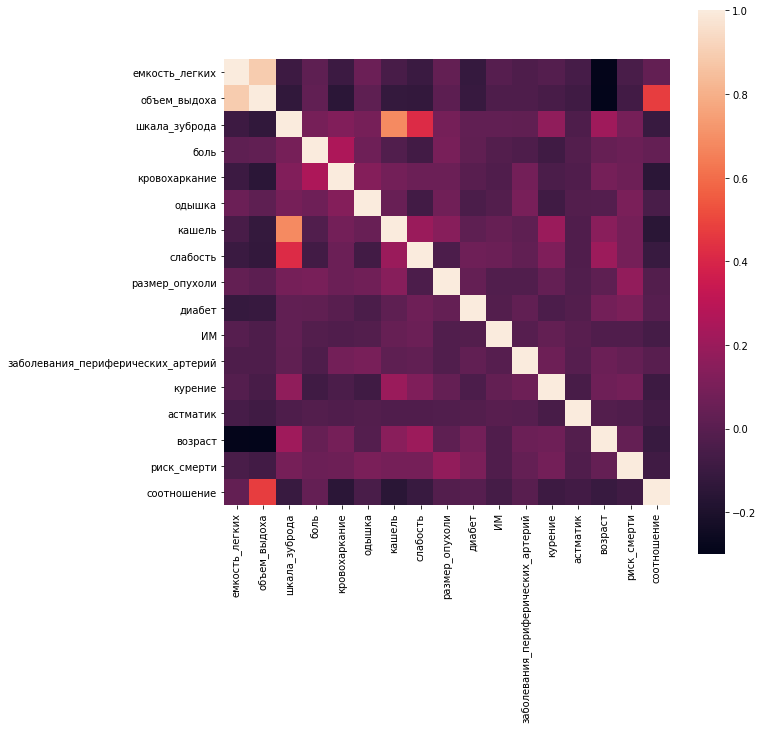

In [245]:
#построим матрицу корреляции признаков, есть выраженные связи
plt.subplots(figsize=(10,10))
ed, encoders = number_encode_features(ed)
sns.heatmap(ed.corr(), square=True)
plt.show()

In [246]:
#удалим объем выдоха
del ed['объем_выдоха']

In [247]:
#создадим обучающую выборку, нормализуем данные
from sklearn.preprocessing import scale
X = np.array(ed)
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

X

array([[-0.46140527,  0.4097736 , -0.26573489, ..., -0.29134848,
        -0.41833001, -0.14113695],
       [ 0.13597486, -1.46006711, -0.26573489, ..., -1.32611263,
        -0.41833001, -2.03934632],
       [-0.59926222,  0.4097736 , -0.26573489, ..., -0.40632228,
        -0.41833001, -0.10623585],
       ...,
       [-0.277596  ,  0.4097736 , -0.26573489, ..., -1.21113883,
        -0.41833001, -0.77486749],
       [-1.51830858,  0.4097736 , -0.26573489, ...,  1.89315359,
        -0.41833001,  0.89093851],
       [ 1.65240135, -1.46006711, -0.26573489, ..., -1.32611263,
        -0.41833001, -0.10032041]])

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [301]:
#аугментация
def oversample_data(X, y):
    return ADASYN(sampling_strategy='not majority').fit_resample(np.array(X), np.array(y))

In [302]:
def augment_data(X, y):
    try:
        X, y = oversample_data(X, y)
    except:
        pass
    return X, y

In [303]:
X_train, y_train = augment_data(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [304]:
X_train.shape, y_train.shape

((399, 16), (399,))

In [305]:
#SVM
from sklearn.svm import SVC

In [306]:
alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1, scoring = 'f1_macro')
gs.fit(X_train, y_train,)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished


({'C': 5.0, 'kernel': 'poly'}, 0.22611437135919293)

In [307]:
alg = SVC(C =  5.0, kernel = 'poly')
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

In [308]:
# относительно неплохие результаты только для признака 2
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.20      0.12      0.15         8
           2       0.64      0.89      0.74        44
           3       0.00      0.00      0.00        13
           4       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.58        71
   macro avg       0.22      0.21      0.21        71
weighted avg       0.45      0.58      0.50        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [309]:
alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs =RandomizedSearchCV(alg, grid, verbose=2, n_jobs = -1, scoring = 'f1_macro')
gs.fit(X_train, y_train,)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


({'C': 5.0, 'kernel': 'rbf'}, 0.2105299121239666)

In [317]:
alg = SVC(C =  5.0, kernel = 'rbf')
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

In [318]:
# не смог обнаружить диагноз 4, рещультаты хуже чем при использовании GridSearchCV
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.14      0.12      0.13         8
           2       0.63      0.89      0.74        44
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.56        71
   macro avg       0.13      0.17      0.14        71
weighted avg       0.41      0.56      0.47        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [319]:
#логистическая регрессия
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight = 'balanced')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [320]:
# опознал диагнозы 3,6, но по 2 диагнозу несколько хуже
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.20      0.38      0.26         8
           2       0.87      0.30      0.44        44
           3       0.23      0.23      0.23        13
           4       0.33      0.75      0.46         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.32        71
   macro avg       0.38      0.38      0.34        71
weighted avg       0.63      0.32      0.38        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [339]:
#KNN
from sklearn import dummy


knn = KNeighborsClassifier(n_neighbors=2) 

clf_knn = knn.fit(X_train, y_train)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_train)

In [343]:
predictions = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [344]:
#результаты в целом хуже чем у логистической регрессии
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.25      0.16         8
           2       0.59      0.66      0.62        44
           3       0.25      0.08      0.12        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.45        71
   macro avg       0.14      0.14      0.13        71
weighted avg       0.43      0.45      0.43        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
